# Ford GoBike System Data Exploration

## by (Ahmed Mohsen)

## Preliminary Wrangling

> This document discusses the dataset that contains information about individual rides made
in a bike-sharing system covering the greater San Francisco
Bay area. The data set contains 183412 trips 16 features. 
 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
df.shape

(183412, 16)

In [5]:
# information content
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


### What is the structure of your dataset?

The Ford GoBike System Dataset consists of 183412 bike rides and, include the 16 following columns:
 
* Duration Trips (in seconds)
* Start Date and Time
* End Date and Time
* Start Station ID
* Start Station Name
* Start Station Latitude
* Start Station Longitude
* End Station ID
* End Station Name
* End Station Latitude
* End Station Longitude
* Bike ID
* User Type (Subscriber or Customer)
* member birth year
* member_gender
* bike_share_for_all_trip

### What is/are the main feature(s) of interest in your dataset?

> The number of trips and the duration of the travel, and how they depend on other features.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think that the members gender, members ages, and the user type have clear associations with the number of trips and the duration of the trips.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [7]:
# Features Statistics
display(df.describe())

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [8]:
# Is there a duplicated values?
df.duplicated().any()

False

In [9]:
# count the missing values
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [10]:
df['age'] = 2019 - df.member_birth_year

In [11]:
df.dropna(subset=['age'], inplace= True)

In [12]:
df.isna().sum()

duration_sec                 0
start_time                   0
end_time                     0
start_station_id           195
start_station_name         195
start_station_latitude       0
start_station_longitude      0
end_station_id             195
end_station_name           195
end_station_latitude         0
end_station_longitude        0
bike_id                      0
user_type                    0
member_birth_year            0
member_gender                0
bike_share_for_all_trip      0
age                          0
dtype: int64

In [13]:
bins = [0, 25, 45, 65, np.inf]
names = ['Youth', 'Younger Adults','Older Adults','Seniors']

df['AgeRanges'] = pd.cut(df['age'], bins, labels=names)

In [14]:
df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,AgeRanges
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,35.0,Younger Adults
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,47.0,Older Adults
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,30.0,Younger Adults
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,45.0,Younger Adults
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,60.0,Older Adults
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No,36.0,Younger Adults
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No,30.0,Younger Adults
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No,31.0,Younger Adults
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No,27.0,Younger Adults
10,458,2019-02-28 23:57:57.2110,2019-03-01 00:05:35.4350,370.0,Jones St at Post St,37.787327,-122.413278,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5318,Subscriber,1996.0,Female,Yes,23.0,Youth


## Univariate Exploration



### What is the most frequent age category does trips?

In [15]:
type_counts = df.AgeRanges.value_counts(sort=True)
type_order = type_counts.index
n_trips = type_counts.sum()

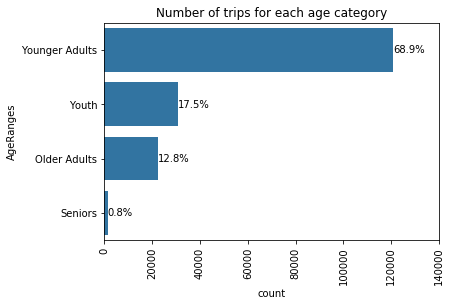

In [16]:
# Choose the first tuple of RGB colors
base_color = sb.color_palette()[0]

sb.countplot(data= df, y='AgeRanges', color=base_color, order=type_order);

# Logic to print the proportion text on the bars
for i in range(len(type_counts)):
    count = type_counts[type_order[i]]
    # Convert count into a percentage, and then into string
    age_string = '{:0.1f}%'.format(100 * count/n_trips)
    # Print the string value on the bar. 
    plt.text(count+1, i, age_string, va='center', color = 'black')
    
plt.title('Number of trips for each age category')
plt.xticks(rotation=90);     
plt.xlim([0, 140000]);

- According to this visualizes, It's obvious that the most age category has trips is <b> Younger Adults</b> with age range <b>25-40</b> where <b>68.9%</b> of the total trips are a Younger Adult

### What is the most frequent gender type does trips?

In [17]:
sorted_counts = df.member_gender.value_counts()
n_trips = sorted_counts.sum()

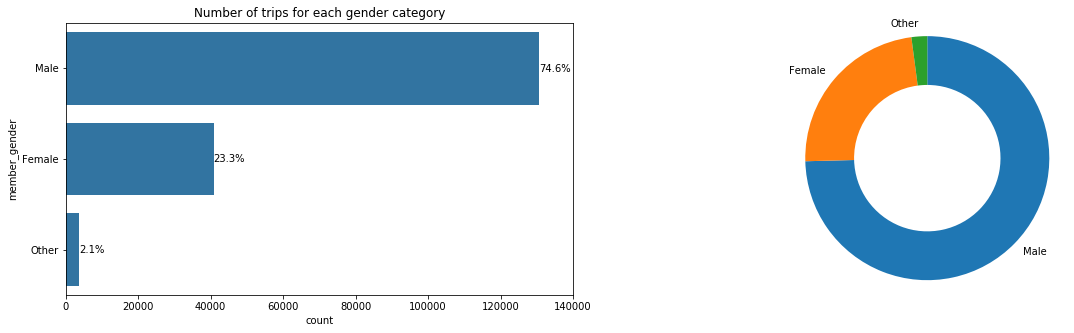

In [18]:
# Resize the chart, and have two plots side-by-side
# Set a larger figure size for subplots
plt.figure(figsize = [20, 5]) 

# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 
base_color = sb.color_palette()[0]
sb.countplot(data= df, y='member_gender', color=base_color, order=sorted_counts.index);

# Logic to print the proportion text on the bars
for i in range(len(sorted_counts)):
    count = sorted_counts[sorted_counts.index[i]]
    # Convert count into a percentage, and then into string
    age_string = '{:0.1f}%'.format(100 * count/n_trips)
    # Print the string value on the bar. 
    plt.text(count+1, i, age_string, va='center', color = 'black')
plt.xlim([0, 140000])
plt.title('Number of trips for each gender category');

plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
plt.pie(sorted_counts, labels =sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square');

- According to this visualizes, It's obvious that the most gender category has trips is <b> Male</b> where <b>74.6%</b> of the total trips.

### What is the most time Duration frequence in Seconds?

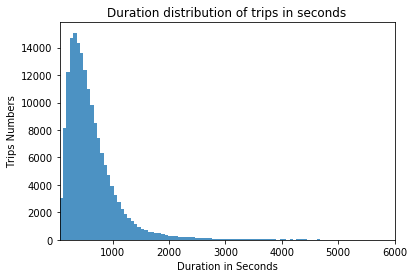

In [19]:
# Distribution of Trip Durations in sconds
bins = np.arange(df['duration_sec'].min(), df['duration_sec'].max()+60, 60)
sb.distplot(df['duration_sec'], bins = bins, kde = False, hist_kws = {'alpha' : 0.8});
plt.title('Duration distribution of trips in seconds')
plt.xlabel('Duration in Seconds')
plt.ylabel('Trips Numbers')
plt.xlim([df['duration_sec'].min(), 6000])
plt.show()

- the most time duration frequence in seconds is <b>300-600</b> seconds.

In [20]:
# Converting datetime columns(start time, end time) to pandas datetime object.
df.start_time, df.end_time = pd.to_datetime(df.start_time), pd.to_datetime(df.end_time)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 18 columns):
duration_sec               175147 non-null int64
start_time                 175147 non-null datetime64[ns]
end_time                   175147 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     175147 non-null float64
start_station_longitude    175147 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       175147 non-null float64
end_station_longitude      175147 non-null float64
bike_id                    175147 non-null int64
user_type                  175147 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    175147 non-null object
age                        175147 non-null float64
AgeRanges        

In [21]:
# Extract more useful columns
df['start_time_day']= df.start_time.dt.day
df['start_time_day_name']= df['start_time'].dt.day_name()
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,AgeRanges,start_time_day,start_time_day_name
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,35.0,Younger Adults,28,Thursday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,47.0,Older Adults,28,Thursday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,30.0,Younger Adults,28,Thursday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,45.0,Younger Adults,28,Thursday
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,60.0,Older Adults,28,Thursday


### Which days in the week have more trips?

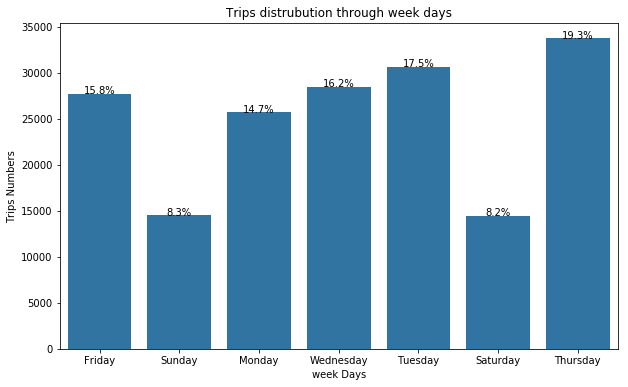

In [22]:
# Distribution of Trip through week days
plt.figure(figsize=[10, 6])
sorted_counts = df['start_time_day_name'].value_counts(sort=False)
n_trips = sorted_counts.sum()

base_color = sb.color_palette()[0]
start_time_day_name_order = df['start_time_day_name'].value_counts(sort=False).index
sb.countplot(data=df, x='start_time_day_name', order=start_time_day_name_order, color=base_color)

# get the current tick locations and labels
locs, labels = plt.xticks() 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    # get the text property for the label to get the correct count
    count = sorted_counts[label.get_text()]
    # Convert count into a percentage, and then into string
    age_string = '{:0.1f}%'.format(100 * count/n_trips)
    # Print the string value on the bar. 
    plt.text(loc, count+2, age_string, ha = 'center', color = 'black')
    
plt.xlabel('week Days')
plt.ylabel('Trips Numbers')
plt.title('Trips distrubution through week days');

It seems that the number of trips in <b>(Thursday-Tuesday-Wednesday)</b> appears to be higher than the number of <b>(Sunday-Saturday)</b>. 

### what is the Distribution of the trips of each user type pre week?

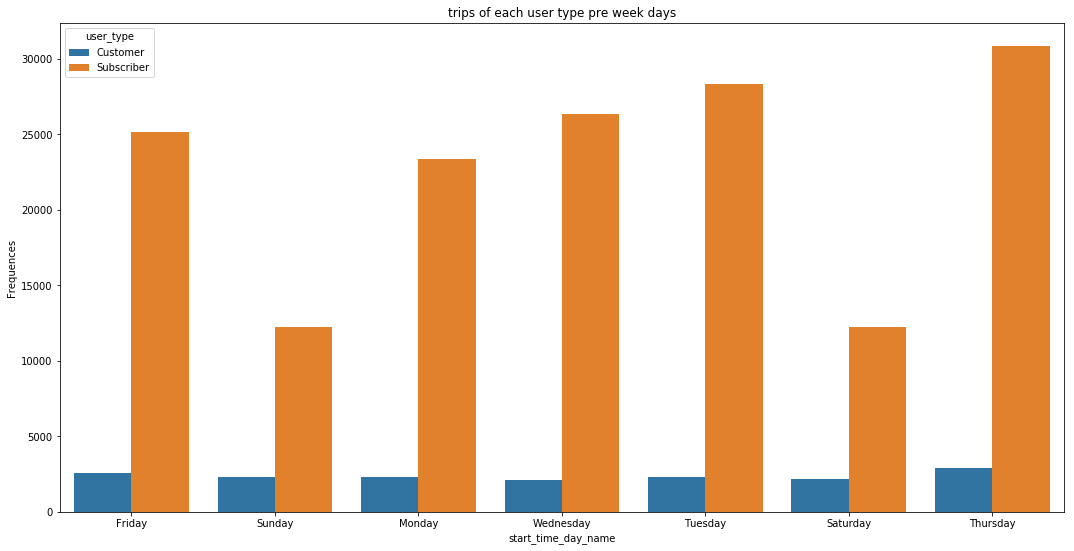

In [23]:
plt.figure(figsize = [18, 9])
start_time_day_name_order = df['start_time_day_name'].value_counts(sort=False).index
sb.countplot(data=df, x='start_time_day_name', hue='user_type', order= start_time_day_name_order);
plt.title('trips of each user type pre week days')
plt.ylabel('Frequences');

From the above plot, subscribed users appear to be going on more trips in the all days of the week and most of them are the middle of the week.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Trips based on Age Categories and weekdays?

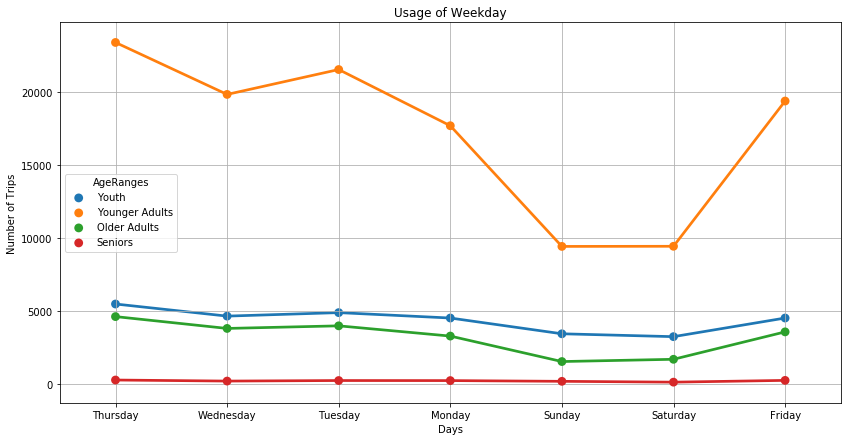

In [24]:
plt.figure(figsize=[14, 7]);

df_classified_user_week = df.groupby(['start_time_day_name', 'AgeRanges']).size().reset_index()
weekday = df.start_time_day_name.unique()

ax = sb.pointplot(data=df_classified_user_week, x='start_time_day_name', y=0, hue = 'AgeRanges', order = weekday);

plt.title('Usage of Weekday');
plt.xlabel('Days')
plt.ylabel('Number of Trips');
plt.grid()

- According to the above plot, The "Younger Adults" have the most number of trips through the weekdays, and "Youth" have the second most trips.

### Average duration trips on Weekdays for Member Gender

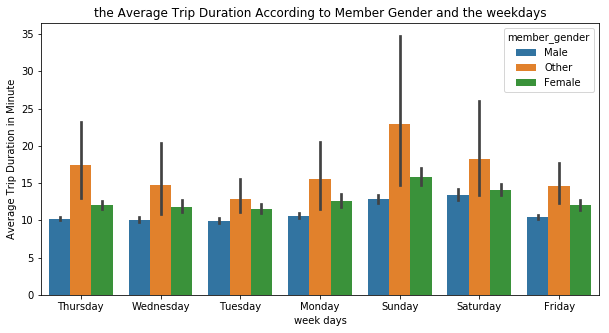

In [25]:
plt.figure(figsize = [10, 5])
df['duration_min'] = (df.duration_sec/60).astype(int)
sb.barplot(data=df, x='start_time_day_name', y='duration_min', hue='member_gender');
plt.xlabel('week days');
plt.ylabel('Average Trip Duration in Minute');
plt.title('the Average Trip Duration According to Member Gender and the weekdays');

- The <b>Other</b> members gender has the most average duration trips throughout all weekdays.     

Conclusions:
1. the most age category has trips is Younger Adults with age range <b>25-40</b> where <b>68.9%</b> of the total trips are a Younger Adult.
2. the most gender category has trips is Male where <b>74.6%</b> of the total trips.
3. Most trip times are between <b>300-600</b> secondslong (mostly between 5 and 10 minutes). 
4. the number of trips in (Thursday-Tuesday-Wednesday) appears to be higher than the number of (Sunday-Saturday).
5. subscribed users appear to be going on more trips in the all days of the week and most of them are the middle of the week.
6. The "Younger Adults" have the most number of trips through the weekdays, and "Youth" have the second most trips.
7. The Other members gender has the most average duration trips throughout all weekdays.